## <font color=red>$$ # Lending Club Case Study $$</font>
<font color=blue>**Contributors:**</font><br>
<font color=red>Aakash Sharma & Sweta Samant</font>

> ### <font color=red>Data Understanding</font>

In [26]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [27]:
# Reading the dataset and checking the first five rows
data = pd.read_csv('loan.csv')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [28]:
#Checking the shape of the dataframe
data.shape

(39717, 111)

In [56]:
#Describing Numerical columns
data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,3.672700e+04,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,3.672700e+04,36727.000000,36727.000000
mean,6.834112e+05,11153.772429,10884.731941,10444.972091,11.979982,325.014427,6.947194e+04,13.337557,0.041740
std,2.014270e+05,7368.371590,7107.535242,7008.417895,3.701048,208.852376,6.406963e+04,6.649275,0.200678
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000
25%,5.173150e+05,5500.000000,5425.000000,5000.000000,8.940000,167.730000,4.120000e+04,8.220000,0.000000
50%,6.600630e+05,10000.000000,9600.000000,9000.000000,11.830000,280.410000,6.000000e+04,13.430000,0.000000
75%,8.310995e+05,15000.000000,15000.000000,14355.564545,14.460000,429.450000,8.300000e+04,18.590000,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000


> ### <font color=red>Data Cleaning</font>

In [29]:
#printing columns that have more than 0% null values or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[null_perc > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [30]:
#Removing columns which has more than 30% null values in it, because minimum 30% we can remove.
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [31]:
data.shape

(39717, 53)

In [32]:
#checking how many unique values are there in each column
data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

>We can observe that the column name **tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, collections_12_mths_ex_med, initial_list_status, pymnt_plan** has only 1 unique value. So we can remove those column as it won't give us useful information.

In [33]:
#Dropping Columns with only one values.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 
           'pymnt_plan'], axis=1, inplace=True)
data.shape

(39717, 44)

In [34]:
#once again analysing the unique value in descending order
data.nunique().sort_values(ascending=False).head(10)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
dtype: int64

>We can observe that the column named **id, url and member_id** are having same number of unique value. So, in this case we can remove both columns as we required only one primary key.

In [35]:
#dropping url and member_id
data.drop(['url', 'member_id'], axis=1, inplace=True)
data.shape

(39717, 42)

In [36]:
#null values check again
data.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_py

> **emp_title** have more null values, let's drop it.

In [37]:
#dropping emp_title column
data.drop(['emp_title'], axis=1, inplace=True)
data.shape

(39717, 41)

In [38]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

> As we can see from above, there are some null values percentage, so we can remove rows which is null.

In [39]:
#dropping the rows of above null values
data.dropna(subset=['emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
data.shape

(37825, 41)

In [40]:
#Rechecking percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

>As we can see, there is no null values left.

In [41]:
# Analysing the Loan Status Column
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

>Loan Status Column has 3 distict values out of them we need only **Fully Paid and Charged Off**. So, we will remove the rows with Current values in loan status.

In [42]:
#dropping rows having value current
data = data[data["loan_status"] != 'Current']
data.shape

(36727, 41)

In [43]:
# Analysing the term Column
data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

> As we can see, there is a gap before month number, so we can remove empty sapce.

In [44]:
#Stripping empty space in values in term
data["term"] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [45]:
data.shape

(36727, 41)

In [47]:
#Columns check
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

>The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval, so we can remove it.

In [48]:
#Dropping customer behaviour columnS
data.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1, inplace=True)
data.shape

(36727, 21)

>**Data Type Conversion**

In [49]:
#Checking datatypes in all coulmns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [50]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0


> **issue_d** column is date, but showing object (string), we have to convert it to Date Format.

In [51]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')

>**int_rate** column is having % symbol and datatype is object (string), we neet remove symbol and convert it to float.

In [52]:
#stripping '%' value and convert datatype to float
data['int_rate'] = data.int_rate.str.strip('%').astype(float)

In [53]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0


In [54]:
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

>**Outlier Detection & Treatment**

<AxesSubplot:xlabel='annual_inc'>

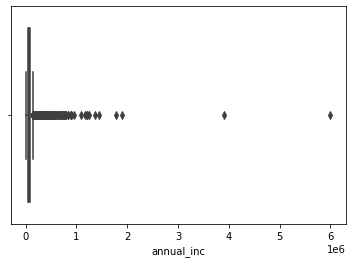

In [60]:
#Analyse outliers in annual_inc using boxplot
sns.boxplot(data['annual_inc'])

>From above plot we can say that their is a presence of outlier. we need to remove those number

In [61]:
data.annual_inc.quantile([0.90, 0.95, 0.97,0.98, 0.99])

0.90    117000.0
0.95    142000.0
0.97    166000.0
0.98    189000.0
0.99    235000.0
Name: annual_inc, dtype: float64

In [62]:
#removing the values after 95 percentile
percent_95 = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= percent_95]

<AxesSubplot:xlabel='annual_inc'>

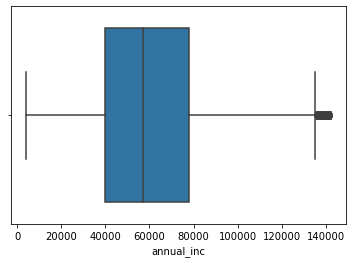

In [63]:
sns.boxplot(data['annual_inc'])

> **Derived Variables**

>Creating more derived date columns from issue_d column

In [64]:
#Creating more derived columns from issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

>Creating Approved Loan amount ratio which is a ratio of Funded Amount / investor to Requested Loan amount.

In [65]:
data['approved_loan_amt_percent'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

In [66]:
#Describing data
data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,approved_loan_amt_percent
count,3.489900e+04,34899.000000,34899.000000,34899.000000,34899.000000,34899.000000,34899.000000,34899.000000,34899.000000,34899.000000
mean,6.829234e+05,10782.310381,10530.118341,10107.019089,11.934154,314.244818,61591.454822,13.509240,0.042924,94.914414
std,2.015355e+05,7065.489229,6814.946313,6717.290363,3.676556,199.316827,27750.507078,6.639886,0.203394,14.917315
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4000.000000,0.000000,0.000000,0.000000
25%,5.172475e+05,5200.000000,5000.000000,5000.000000,8.940000,164.860000,40000.000000,8.430000,0.000000,98.460000
50%,6.587840e+05,9525.000000,9175.000000,8750.000000,11.830000,273.100000,57000.000000,13.650000,0.000000,100.000000
75%,8.301240e+05,15000.000000,14400.000000,13925.000000,14.420000,411.670000,78000.000000,18.750000,0.000000,100.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,142000.000000,29.990000,2.000000,100.000000


>From above data description the the Standard deviation of the columns **loan amount, annual income , int rate and dti are around 7000, 27000, 4 and 6 appx**. So we can create bins of these colmns by **7000, 20000, 5, 5 resp**.

In [67]:
# categorise loan amounts into buckets which will help in analysis further.
data['loan_amnt_bin'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
data['annual_inc_bin'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
data['int_rate_bin'] = pd.cut(data['int_rate'], [5, 10, 15, 20], labels=['5-10', '10-15', '15-20'])

# categorise dti into buckets for bivariate analysis.
data['dti_bin'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])

> changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones

In [68]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
data['loan_status_count'] = data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,approved_loan_amt_percent,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin,loan_status_count
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0,2011,Dec,3,99.5,0-7000,20000-40000,10-15,25-30,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0.0,2011,Dec,3,100.0,0-7000,20000-40000,15-20,0-5,1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0,2011,Dec,3,100.0,0-7000,0-20000,15-20,05-10,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0.0,2011,Dec,3,100.0,7000-14000,40000-60000,10-15,15-20,0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2011,Dec,3,100.0,0-7000,20000-40000,5-10,10-15,0


> ### <font color=red>Data Analysis</font>

> **Univariate Analysis**

>Approved Loan Amount Percentage Analysis

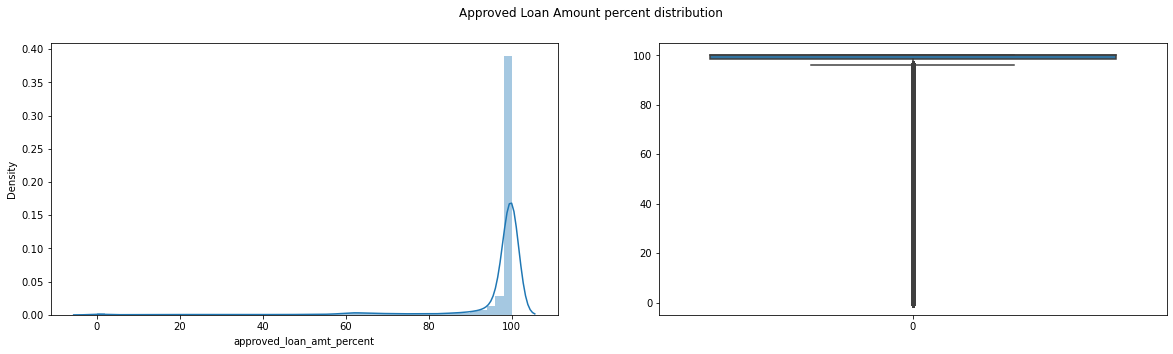

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amt_percent)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amt_percent)
plt.suptitle('Approved Loan Amount percent distribution')
plt.show()

>Observations
>- Around 90% of Borrowers got 100% loan amount from investors.

>Loan Amount Analysis

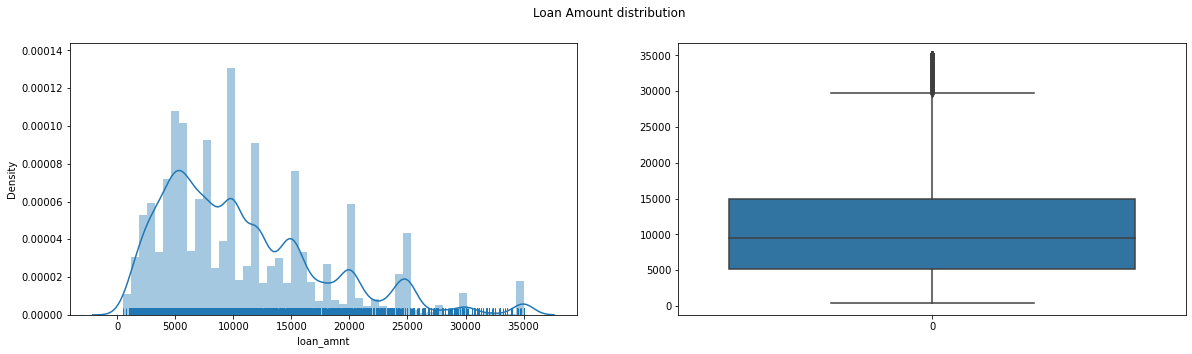

In [73]:
#Setting up the figure size of the plot
plt.figure(figsize=(20,5))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=data.loan_amnt, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=data.loan_amnt)

#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

>Observations
>- From loan amount data, we can say that most of them have taken their loan between **5000 and 15000**.

>Interest Rate Analysis

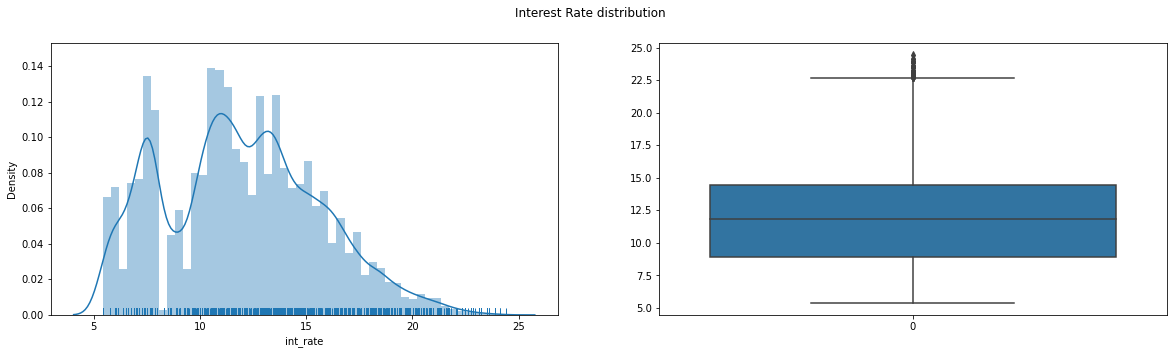

In [74]:
#Setting up the figure size of the plot
plt.figure(figsize=(20,5))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=data.int_rate, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=data.int_rate)

#Single title for both subplots.
plt.suptitle('Interest Rate distribution')
plt.show()

>Observations
>- From interest rate data, we can say that most of the interest rate lies between **9% to 14.5%**.

>Annual Income Analysis

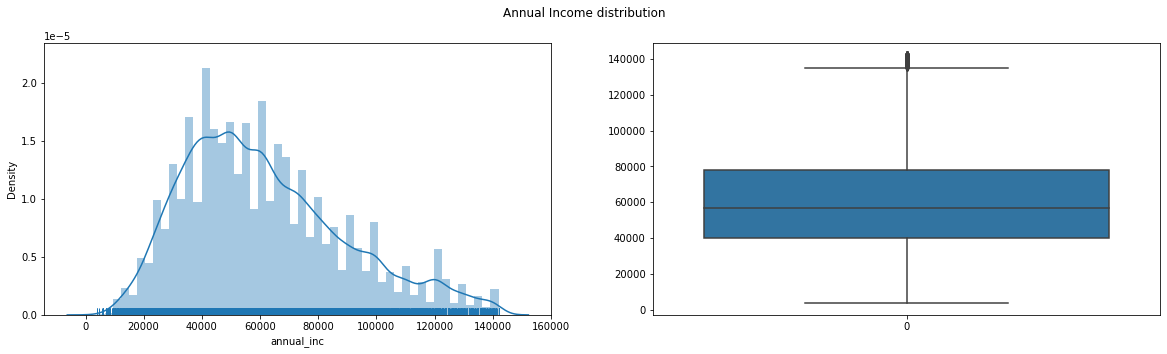

In [75]:
#Setting up the figure size of the plot
plt.figure(figsize=(20,5))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=data.annual_inc, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=data.annual_inc)

#Single title for both subplots.
plt.suptitle('Annual Income distribution')
plt.show()

>Observations
>- From annual income data, we can say that most of the borrower's annual income are in range of **40k to 80k**.

>Installment Analysis

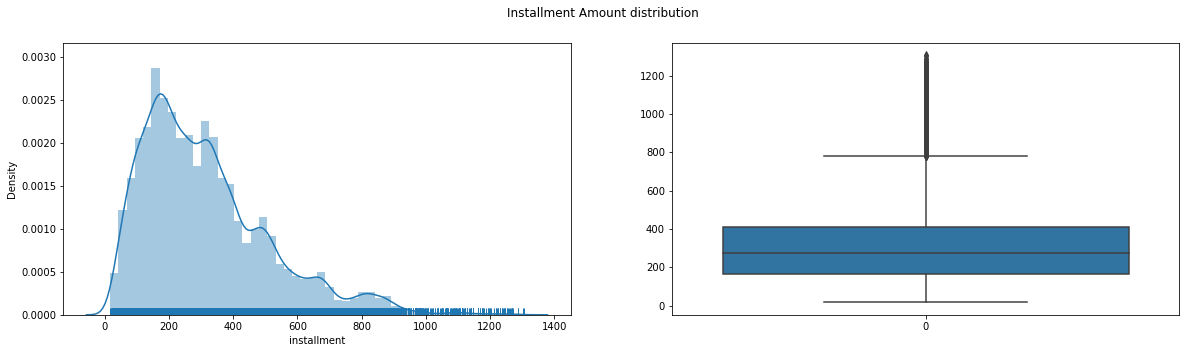

In [77]:
installment = data.installment
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

>Observations:
>- Most Installment Amount lies Between **190 to 400**.

>Debt to Income Ratio Analysis

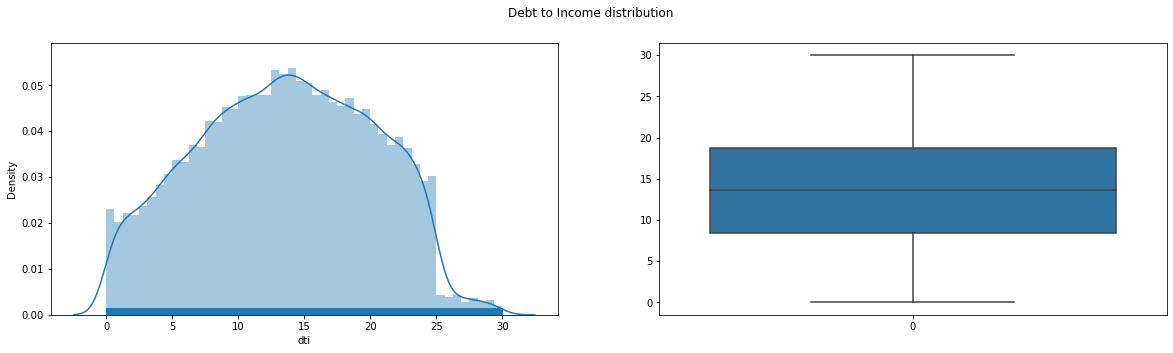

In [79]:
var1 = data.dti

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

>Observations:
>- It shows normal distribution, which is good sign that all the loans are given to barrower's who have Debt to Income ratio less than 25.

>Loan issue date (issue_d) Analysis

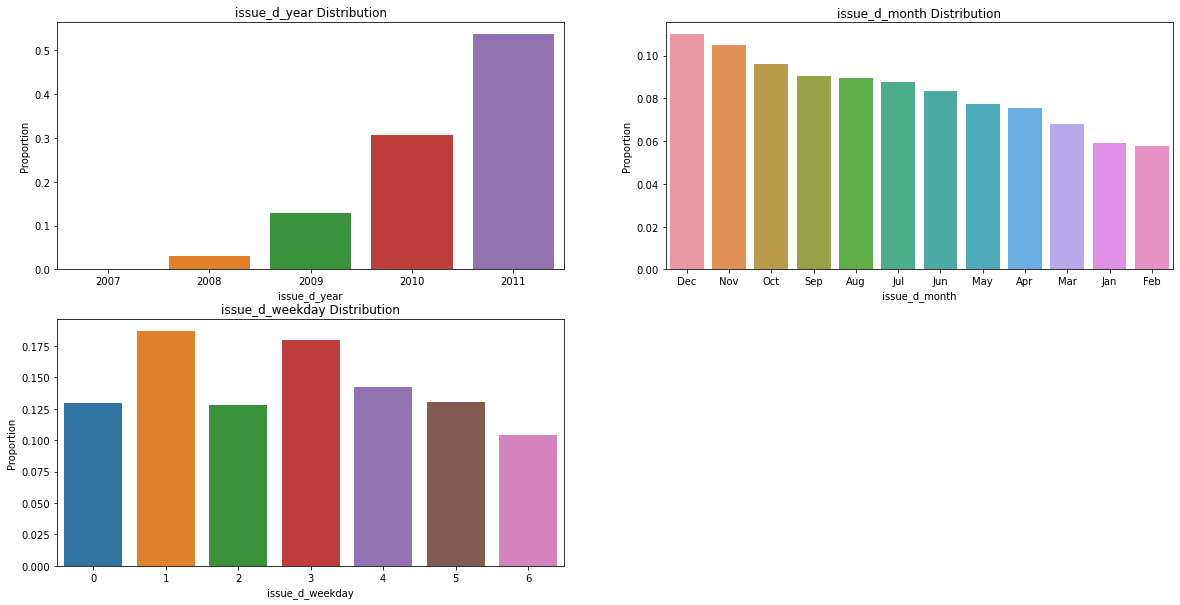

In [89]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

>Observations:
>- The lending club has doubling loan issues every year.
>- There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.
>- It has issued more loans on tuesday and wednessday than other week days.

>Term Analysis

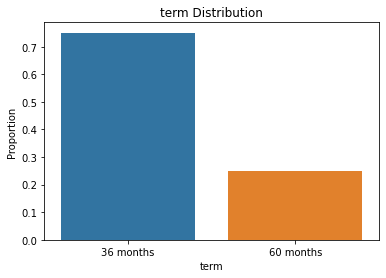

In [92]:
var = 'term'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

>Observations
>- Borrowers have taken 36 months loan tenure more than 60 months.

>Grade Analysis

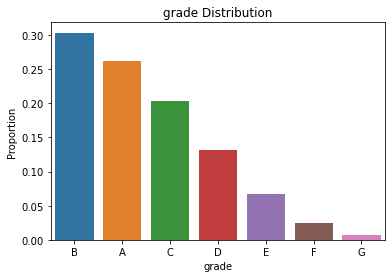

In [93]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

>Observations
>- Most borrowers fall under **A and B grades**.

>Sub-Grade Analysis

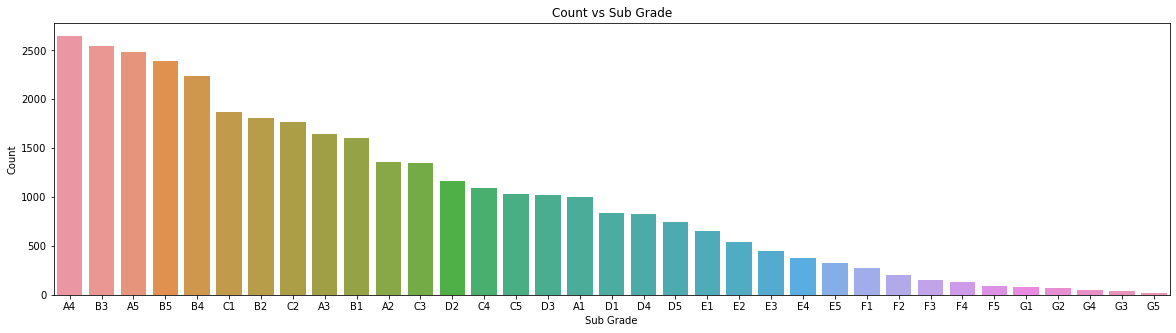

In [95]:
plt.figure(figsize=(20,5))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

>Issue month Analysis

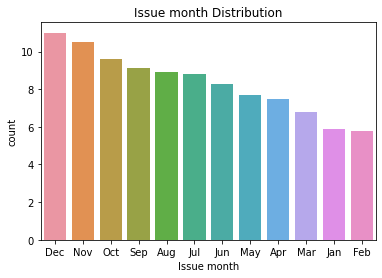

In [96]:
#converting value_count into percentage
ls = data["issue_d_month"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=ls, x="index", y="issue_d_month")
plt.xlabel("Issue month")
plt.ylabel('count')
plt.title('Issue month Distribution')
plt.show()

>Observations
>- The issue of loan is increasing every month from jan to dec.

>Issue year Analysis

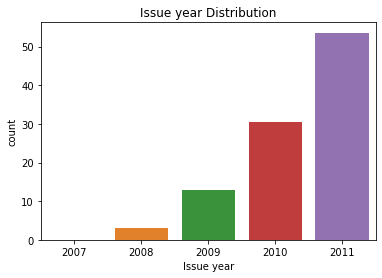

In [98]:
#converting value_count into percentage
ls = data["issue_d_year"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=ls, x="index", y="issue_d_year")
plt.xlabel("Issue year")
plt.ylabel('count')
plt.title('Issue year Distribution')
plt.show()

>Observations
>- Every year the number of loans are doubled.

>Loan Status Analysis

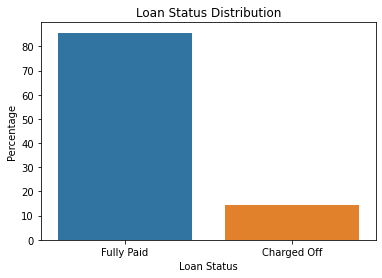

In [99]:
#converting value_count into percentage
ls = data["loan_status"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=ls, x="index", y="loan_status")
plt.xlabel("Loan Status")
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')
plt.show()

>Observations
>- Around 85% have fully paid whereas 15% are charged off.

>Purpose of loans Analysis

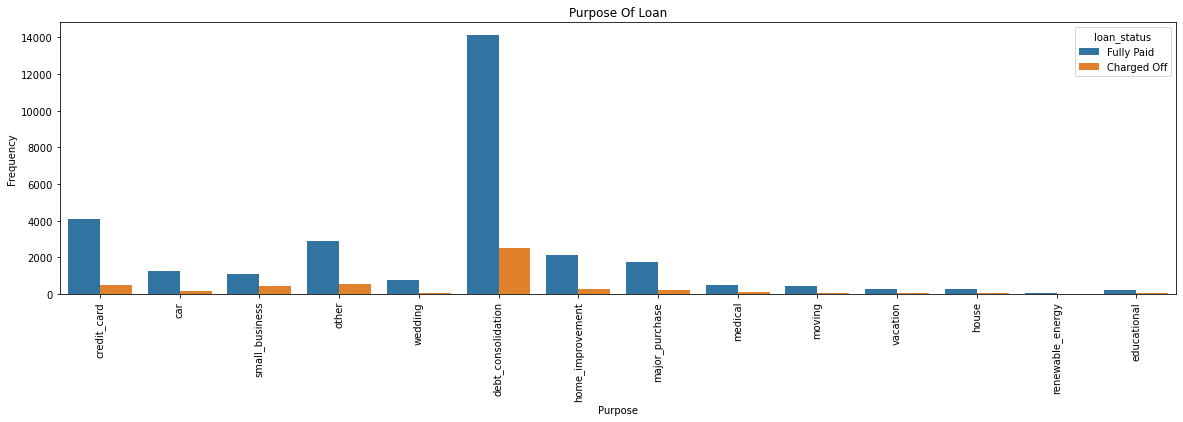

In [101]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="purpose", data=data, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')  
plt.xticks(rotation=90)
plt.show()

>Observations
>- Most of them have taken loan for debt consolidation and paying credit card bills.
>- On the other hand, Charged Off loan status is also high for debt consolidation.

>Home Ownership Analysis

<Figure size 1440x360 with 0 Axes>

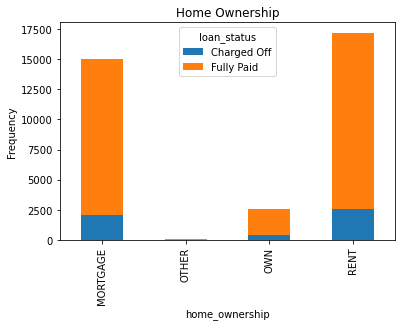

In [102]:
plt.figure(figsize=(20,5))
data.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership",fontdict={'fontsize':12})
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.show()

>Observations
>- Most of them have taken loan who are in rent or mortgage their home.
>- On the other hand, Charged Off loan status is also high for these two home ownership.

>**Segmented Univariate Analysis**

>Loan Amount bins vs Loan Status Analysis

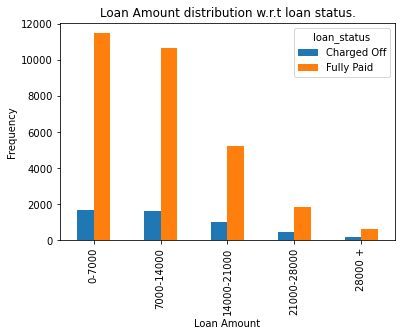

In [104]:
data.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Loan Amount distribution w.r.t loan status.")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

>Observations
>- Below 14k most of the borrowers taken the loan amount and charged off status is also high for those amount.

>Annual income bins vs Loan Status Analysis

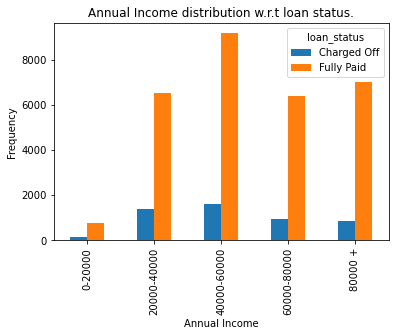

In [105]:
data.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Annual Income distribution w.r.t loan status.")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

>Observations
>- Most of the borrower's annual income is in the range between 40k to 60k.

>Home Ownership vs Loan purpose Analysis

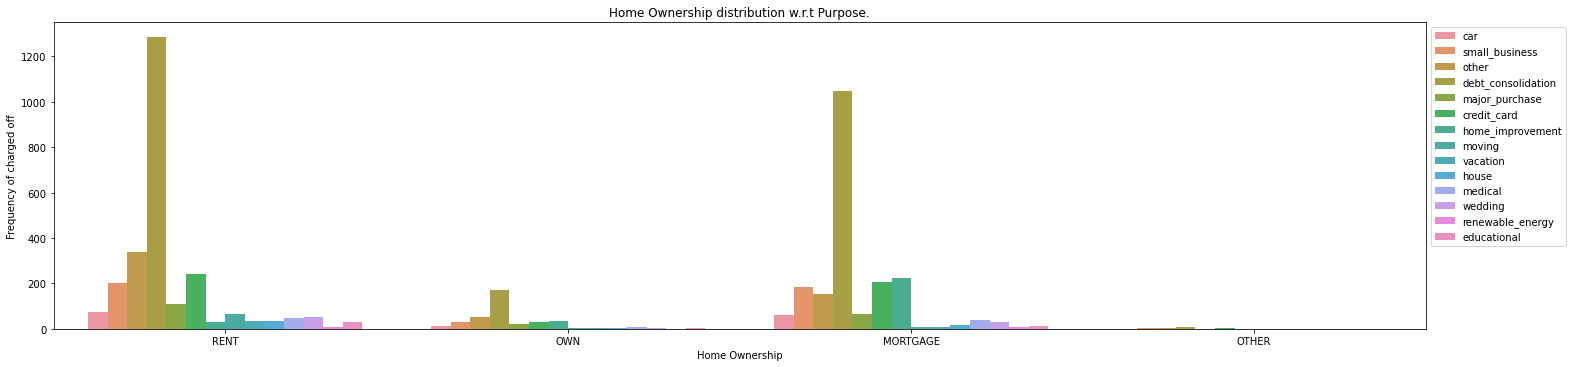

In [106]:
plt.figure(figsize=(20,5))
sns.countplot(x='home_ownership',hue= 'purpose',data=data[data['loan_status']=='Charged Off'])
plt.tight_layout()
plt.title("Home Ownership distribution w.r.t Purpose.")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency of charged off")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

>Observations
>- Most of the borrower's who took loan for the purpose of debt consolidation has highest number of Charged off status and those who are in rent as the most.

>**Bivariate Analysis**

>Term vs Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

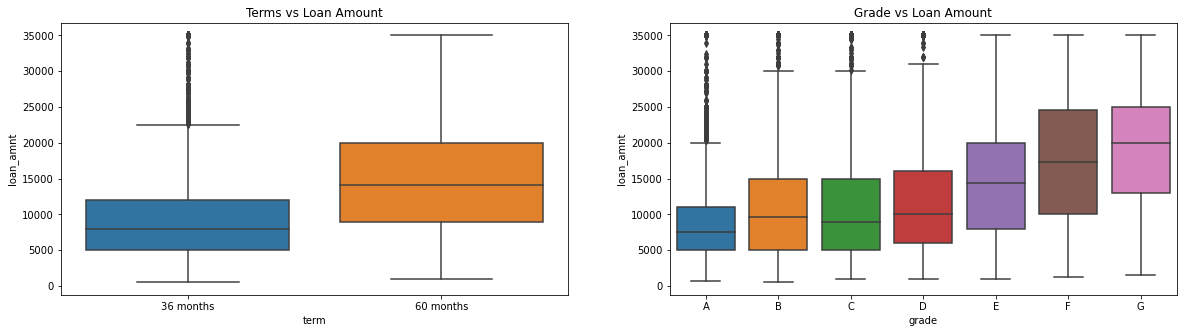

In [107]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

>Observations
>- More the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.


>Grade vs Loan Amount

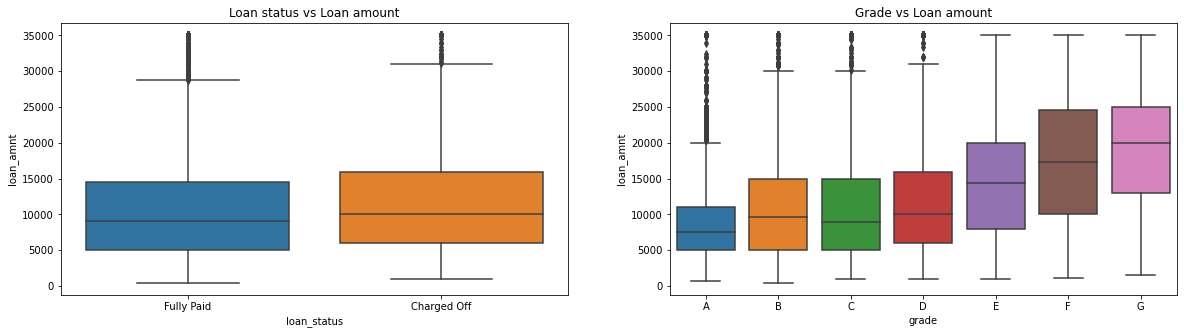

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=data)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=data)
plt.title("Grade vs Loan amount")
plt.show()

>Observations
>- From above we can say that, charged off were having higher loan amount than fully paid.
>- In Grade vs loan amount we can say that, grade F & G are having max amount of loan. As the grade decreases amount of loan is also descreases.
From this we can say that higher the grade more is the risk of default.

>Purpose vs Loan Amount

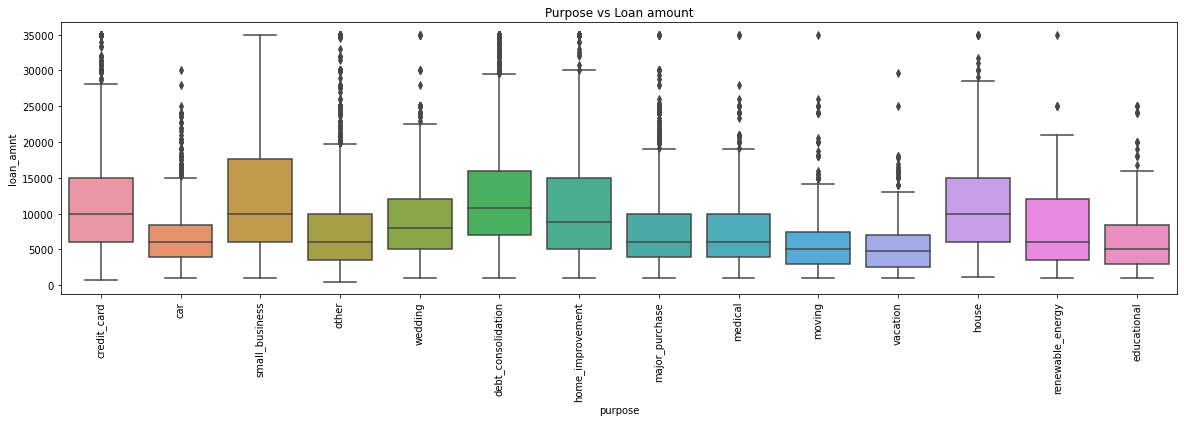

In [112]:
plt.figure(figsize=(20,5))
sns.boxplot(x="purpose", y="loan_amnt", data=data)
plt.title("Purpose vs Loan amount")
plt.xticks(rotation=90)
plt.show()

>Observations
>- Small business borrowers are taking high loan, after that debt_consolidation, credit cards and house.

>Emp Length vs Loan Amount

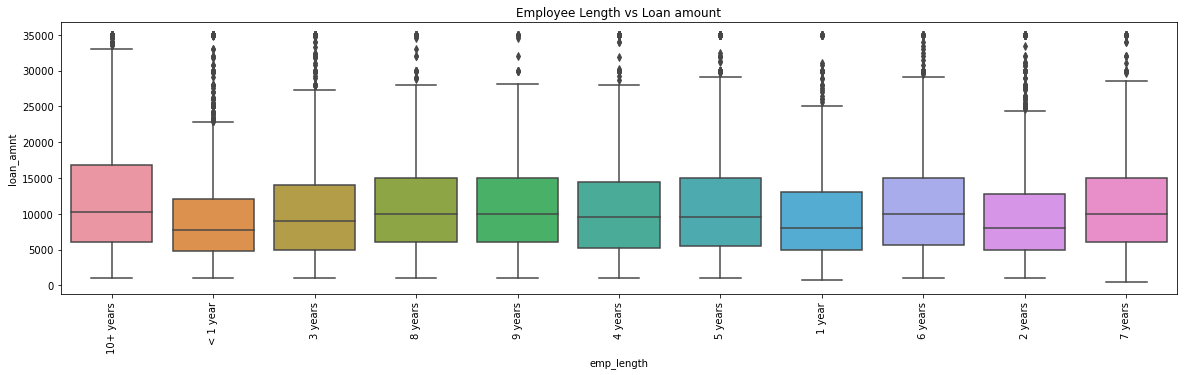

In [114]:
plt.figure(figsize=(20,5))
sns.boxplot(x="emp_length", y="loan_amnt", data=data)
plt.title("Employee Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

>Observations
>- The borrower who has 10+ years of experience are taking high amount of loan than others and borrowers with less than 1 year of experience are taking lesser amount of loan compared to others.

>Home Ownership vs Loan Amount

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

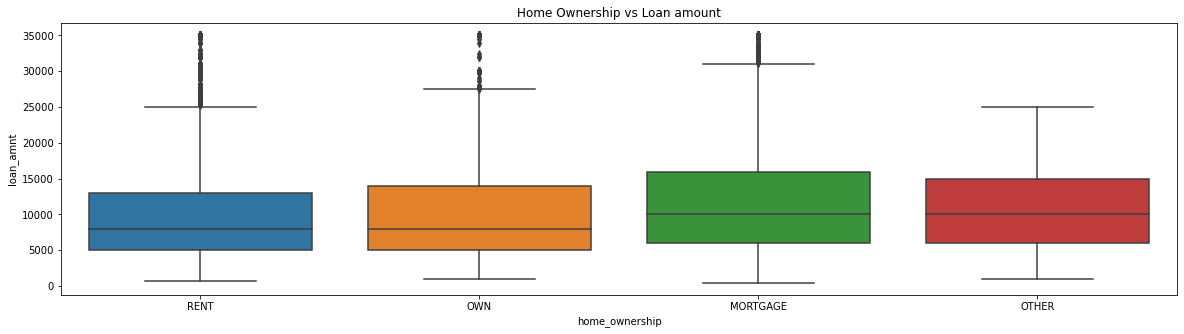

In [115]:
plt.figure(figsize=(20,5))
sns.boxplot(x="home_ownership", y="loan_amnt", data=data)
plt.title("Home Ownership vs Loan amount")

>Observations
>- The borrower who are from Mortgage have taken higher amount of loan then others.

>Issue Amount vs Loan Amount

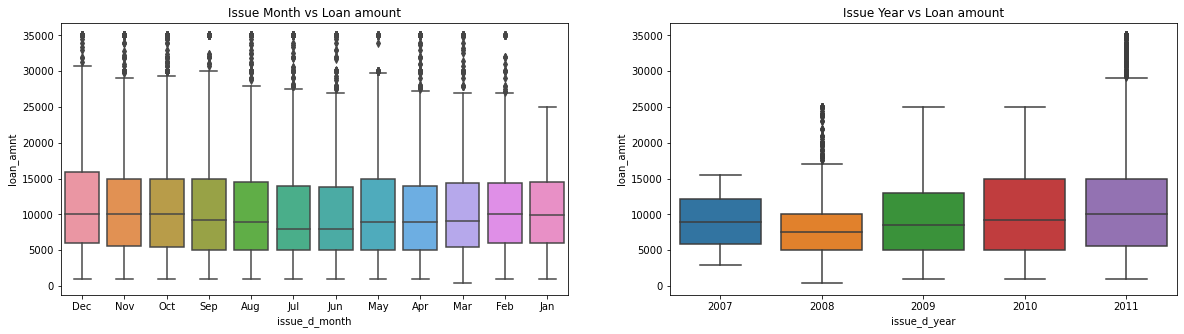

In [116]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="loan_amnt", data=data)
plt.title("Issue Month vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="loan_amnt", data=data)
plt.title("Issue Year vs Loan amount")
plt.show()

>Observations
>- In loan amount vs issue month variable we can say that, highest loan amount is taken in the month of Dec and May whereas median value doesn't vary too much.
>- In Issue year vs loan amount we can say that, highest loan amount is taken in the year 2008 and 2011 as we can see in outliers by some borrowers. And we can say that median value doesn't vary too much but as the year increases high amount of loans are taken.

>Term vs Annual Income

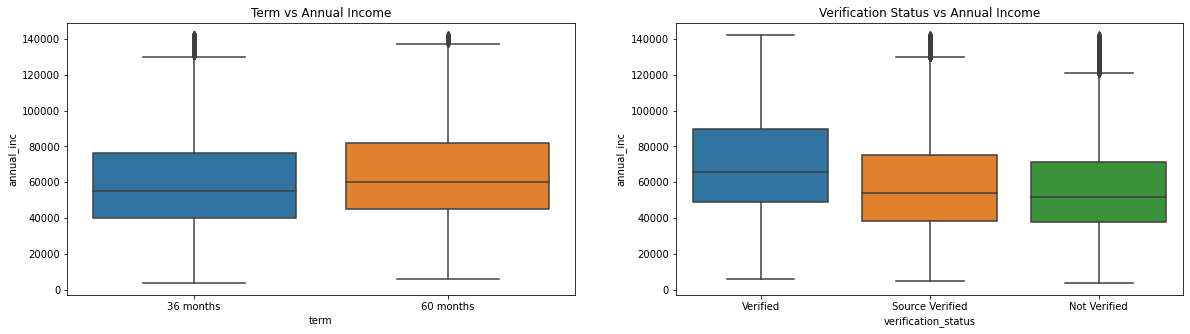

In [117]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=data)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=data)
plt.title("Verification Status vs Annual Income")
plt.show()

>Observations
>- In Term vs Annual Income variable we can say that, the borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.
>- In Verification status vs annual income we can say that, mostly the verified borrowers are having high annual income than others.

>LOan Status vs Annual Income

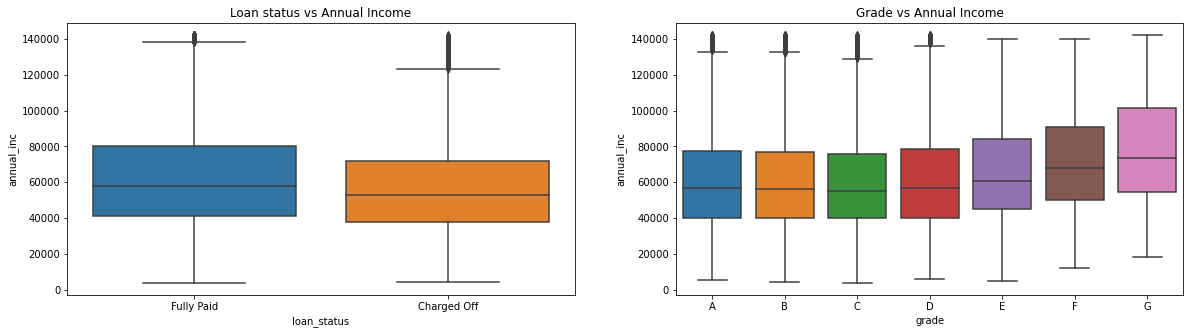

In [162]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=data)
plt.title("Loan status vs Annual Income")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=data)
plt.title("Grade vs Annual Income")
plt.show()

>Observations
>- In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
>- In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

>Home Ownership vs Annual Income

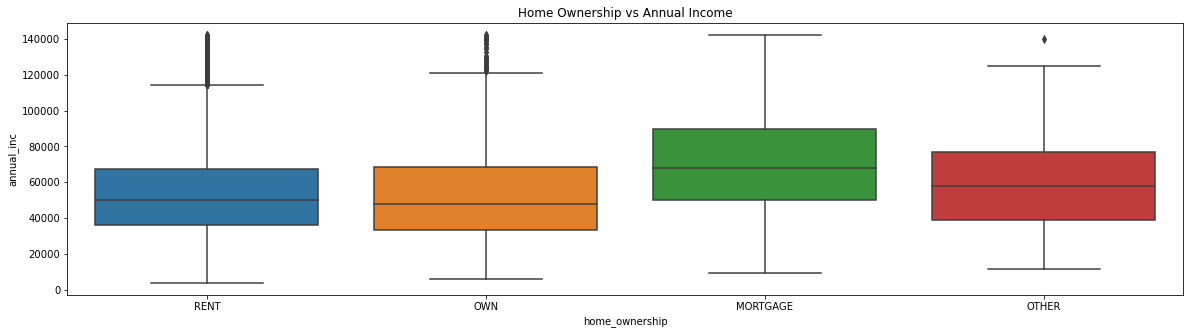

In [119]:
plt.figure(figsize=(20,5))
sns.boxplot(x="home_ownership", y="annual_inc", data=data)
plt.title("Home Ownership vs Annual Income")
plt.show()

>Observations
>- The borrowers who have the status as Mortgage are having high annual income than others.

>Purpose vs Annual Income

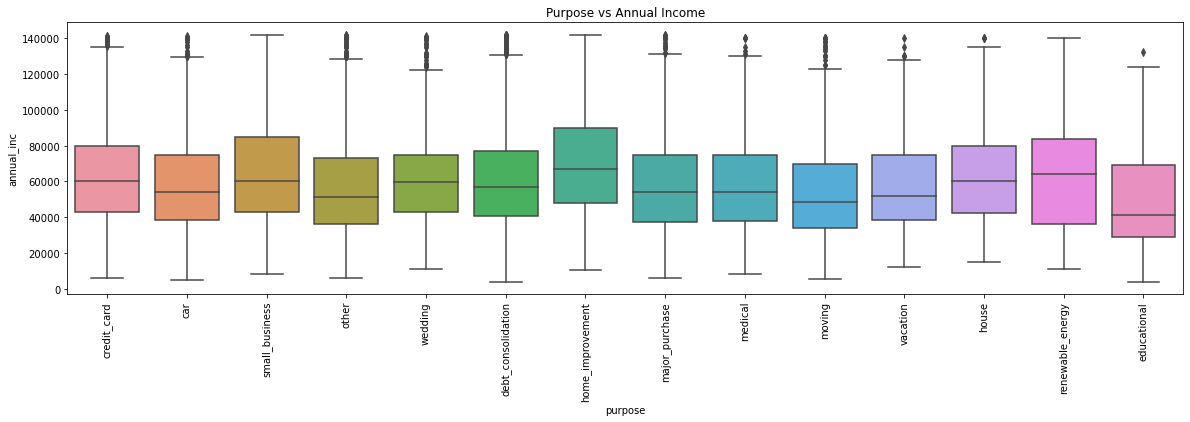

In [120]:
plt.figure(figsize=(20,5))
sns.boxplot(x="purpose", y="annual_inc", data=data)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

>Observations
>- The borrowers who has high annual income are taking loans mostly for home improvement and small business.

>Emp Length vs Annual income

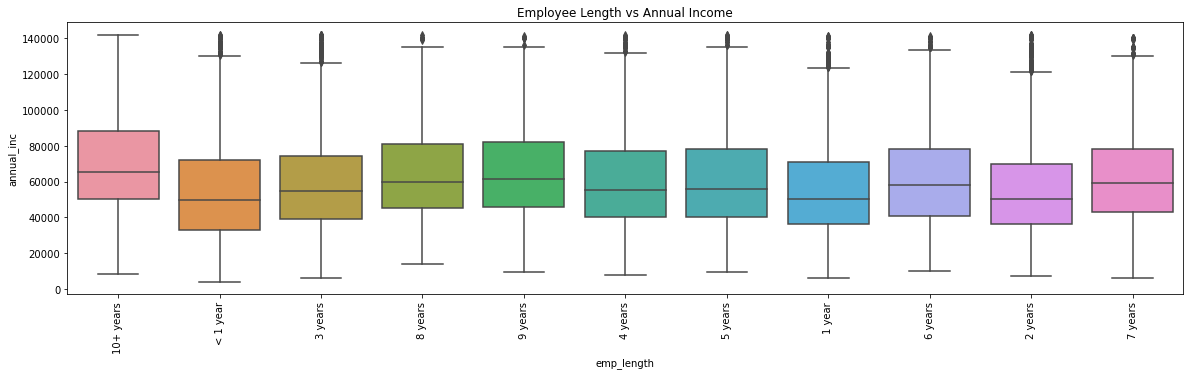

In [121]:
plt.figure(figsize=(20,5))
sns.boxplot(x="emp_length", y="annual_inc", data=data)
plt.title("Employee Length vs Annual Income")
plt.xticks(rotation=90)
plt.show()

>Observations
>- Borrower's whose having 10+ experience are having highest annual income than others and >1 is having least.

>Term vs Interest Rate

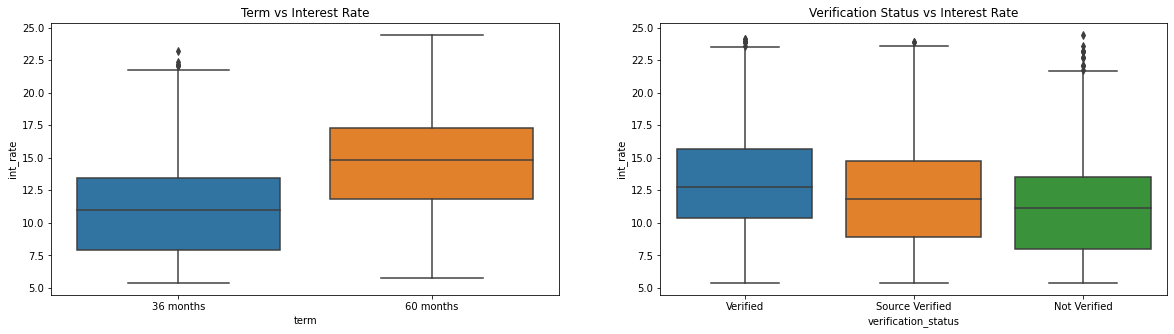

In [123]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=data)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=data)
plt.title("Verification Status vs Interest Rate")
plt.show()

>Observations
>- In term vs interest rate variable we can say that, interest rate is less for those who take loan for 36 months and high for 60 months.
>- In Verification status vs interest rate variable we can say that, Verified borrower gets more loan at higher interest rate compared to others.

>Loan Status vs Int Rate

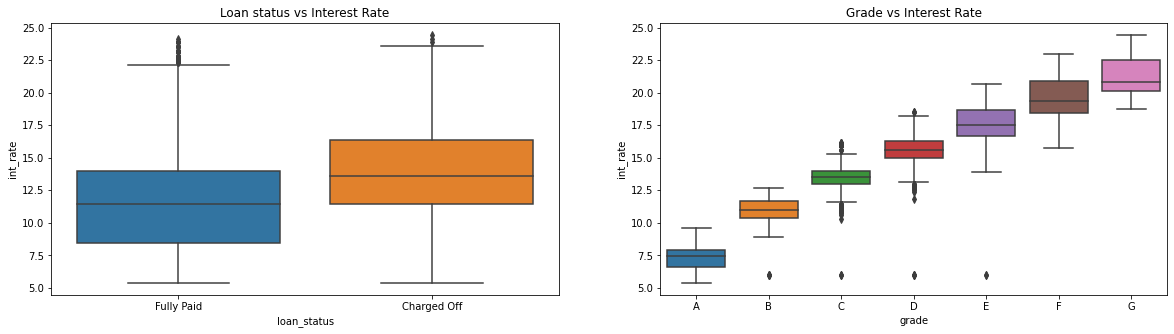

In [165]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=data)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=data)
plt.title("Grade vs Interest Rate")
plt.show()

>Observations
>- In loan status vs interest rate variable we can say that, the borrowers who has high interest rate are mostly defaulters.
>- In grade vs interest rate we can say that, as the grade decreases, interest rate is also increasing.

>Home Ownership vs Int Rate

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

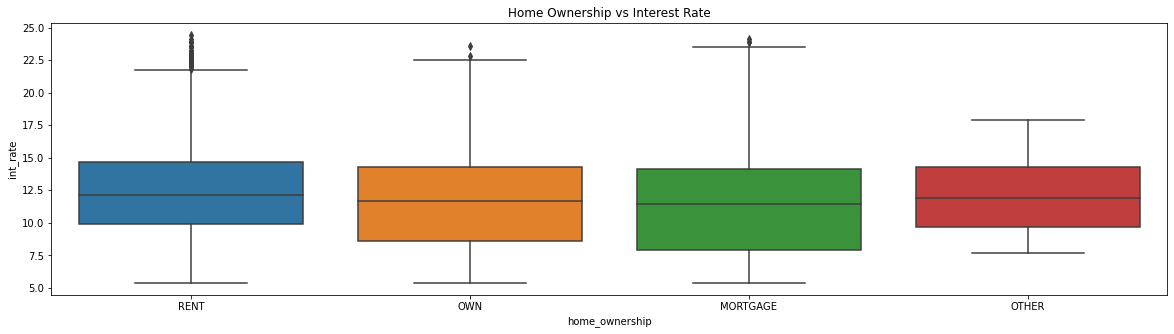

In [128]:
plt.figure(figsize=(20,5))
sns.boxplot(x="home_ownership", y="int_rate", data=data)
plt.title("Home Ownership vs Interest Rate")

>Observations
>- The borrowers who are paying rent are getting high interest rate. The borrowers with own and mortgage are getting loan with less interest rate.

>Emp Length vs Int Rate

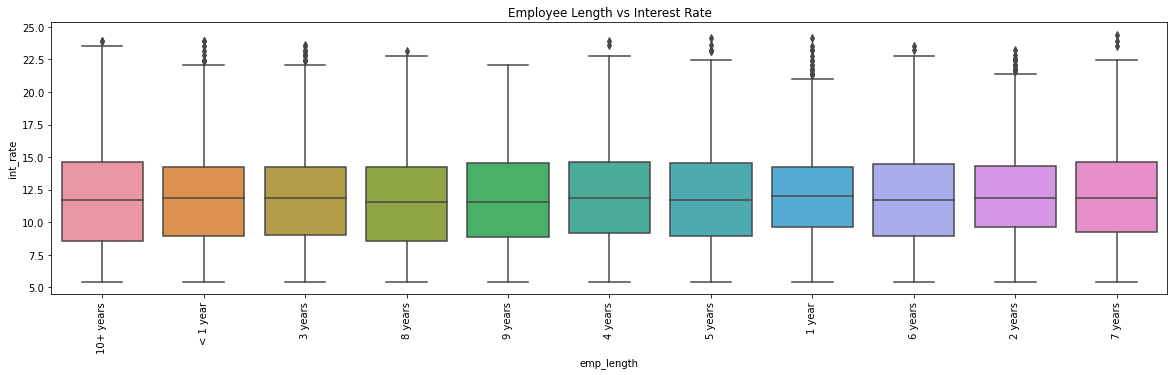

In [129]:
plt.figure(figsize=(20,5))
sns.boxplot(x="emp_length", y="int_rate", data=data)
plt.title("Employee Length vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

>Observations
>- There is no much relation between Employment length and interest rate.

>Purpose vs Int Rate

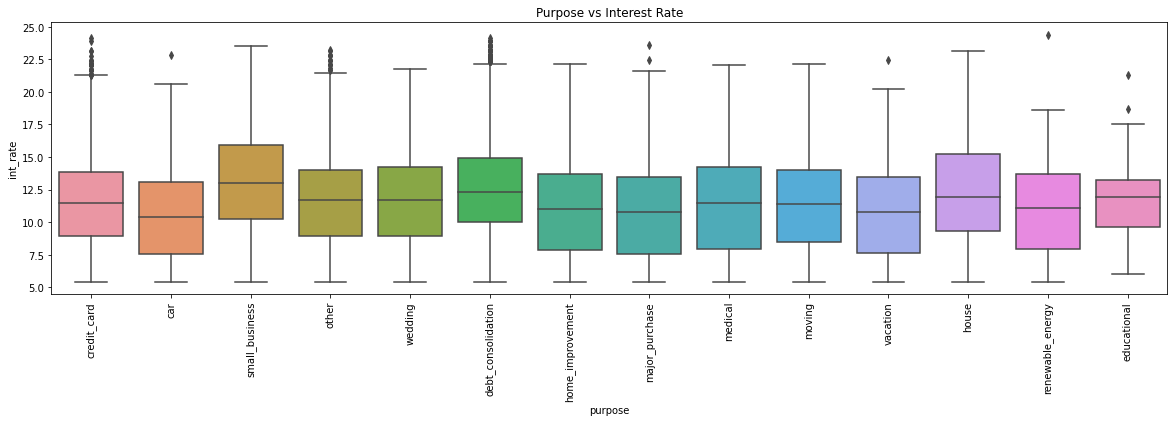

In [130]:
plt.figure(figsize=(20,5))
sns.boxplot(x="purpose", y="int_rate", data=data)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

>Observations
>- Small business , debt consolidation and house loan are geeting loan at high interest rate than others.

>Term vs DTI

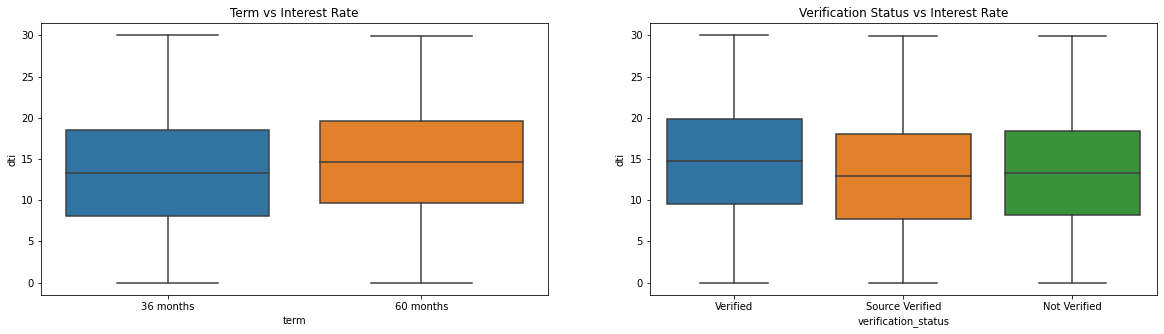

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="dti", data=data)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="dti", data=data)
plt.title("Verification Status vs Interest Rate")
plt.show()

>Observations
>- In interest rate vs term variable we can say that, dti ratio is high for the borrower who has 60 months tenure.
>- In Verification status vs dti we can say that, verified borrowers are having high dti ratio.

>Loan Status vs DTI

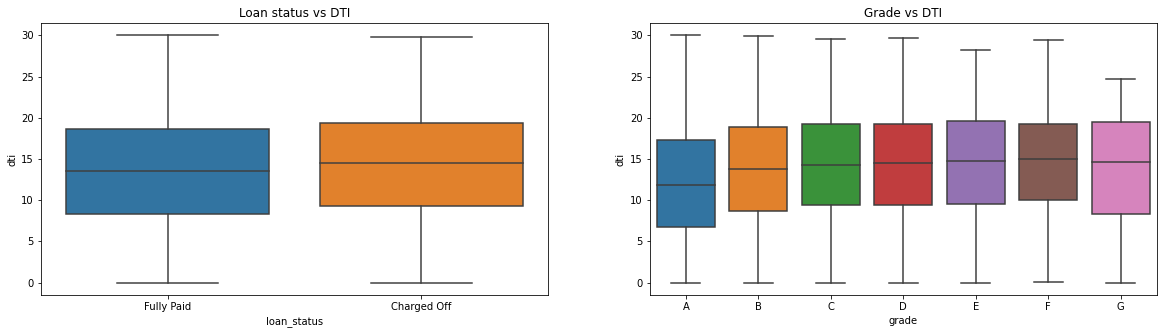

In [132]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=data)
plt.title("Loan status vs DTI")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="dti", order= grade_order, data=data)
plt.title("Grade vs DTI")
plt.show()

>Observations
>- Most of the charged off borrowers are having high dti ratio.
>- As grade decreases dti ratio is increasing.

>Home Ownership vs DTI

Text(0.5, 1.0, 'Home Ownership vs DTI')

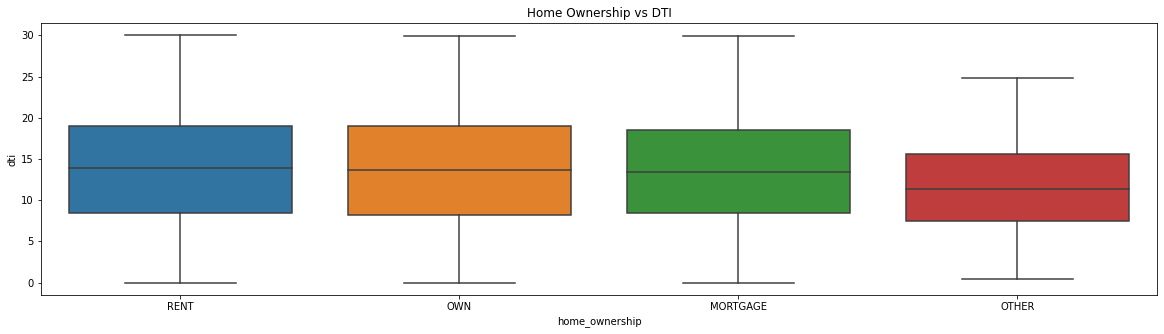

In [133]:
plt.figure(figsize=(20,5))
sns.boxplot(x="home_ownership", y="dti", data=data)
plt.title("Home Ownership vs DTI")

>Observations
>- The borrower with own and rent home status are having high dti ratio than others.

>Emp Length vs DTI

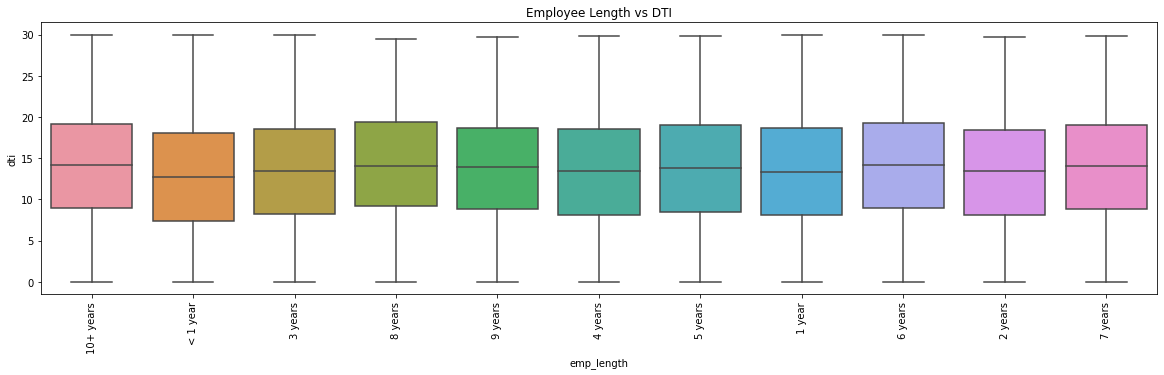

In [134]:
plt.figure(figsize=(20,5))
sns.boxplot(x="emp_length", y="dti", data=data)
plt.title("Employee Length vs DTI")
plt.xticks(rotation=90)
plt.show()

>Observations
>- There is no much relation between employee length and dti ratio.

>Purpose vs DTI

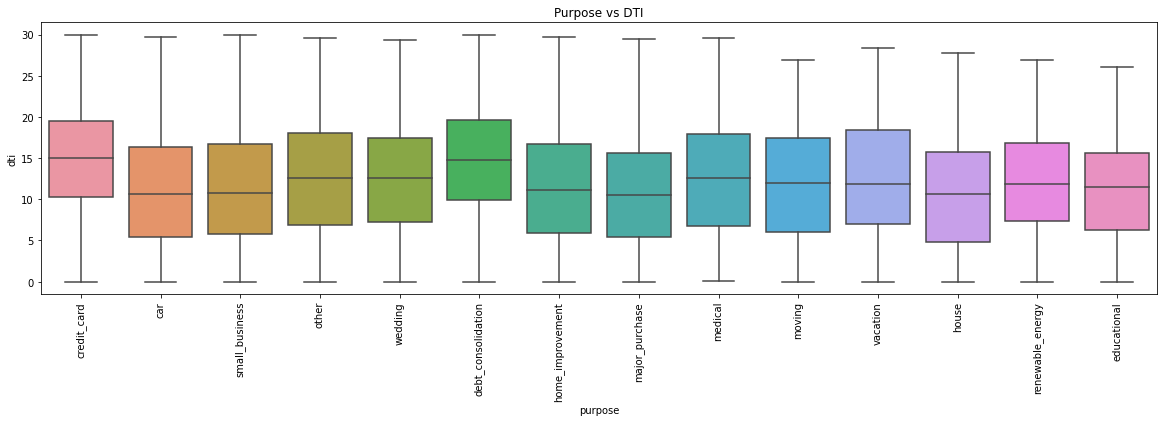

In [135]:
plt.figure(figsize=(20,5))
sns.boxplot(x="purpose", y="dti", data=data)
plt.title("Purpose vs DTI")
plt.xticks(rotation=90)
plt.show()

>Observations
>- The borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others.

>Annual Income vs Chargeoff Proportion

In [136]:
#grouping annual income bin and loan status
annual_inc_bin_vs_loan_status = data.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#creating "Total" variable
annual_inc_bin_vs_loan_status['Total'] = annual_inc_bin_vs_loan_status['Charged Off'] + annual_inc_bin_vs_loan_status['Fully Paid'] 
#calculating chargedoff proportion
annual_inc_bin_vs_loan_status['Chargedoff_Proportion'] = annual_inc_bin_vs_loan_status['Charged Off'] / annual_inc_bin_vs_loan_status['Total']
#sorting the chargedoff proportion in descending order
annual_inc_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,173,774,947,0.182682
1,20000-40000,1369,6539,7908,0.173116
2,40000-60000,1630,9167,10797,0.150968
3,60000-80000,957,6400,7357,0.130080
4,80000 +,876,7014,7890,0.111027


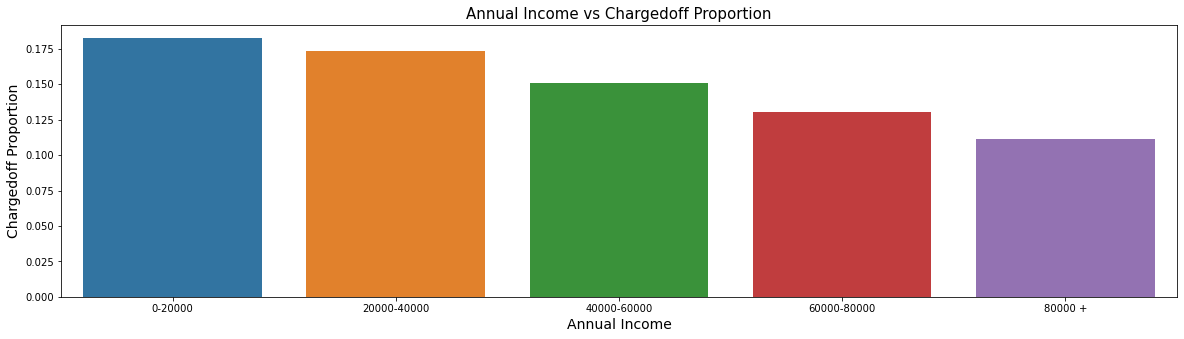

In [138]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
#barplot
ax1=sns.barplot(x='annual_inc_bin', y='Chargedoff_Proportion', data=annual_inc_bin_vs_loan_status)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

>Observations
>- Annual income is increasing charged off proportion is decreasing.
>- So highest charged off proportion are in the range between 0 to 20k annual income.

>Purpose vs Chargeoff Proportion

In [139]:
purpose_vs_loan_status = data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['Chargedoff_Proportion'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']
purpose_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,417,1111,1528,0.272906
10,renewable_energy,16,70,86,0.186047
3,educational,46,234,280,0.164286
5,house,52,267,319,0.163009
7,medical,97,512,609,0.159278
9,other,543,2884,3427,0.158448
8,moving,79,437,516,0.153101
2,debt_consolidation,2509,14107,16616,0.150999
12,vacation,49,282,331,0.148036
4,home_improvement,292,2140,2432,0.120066


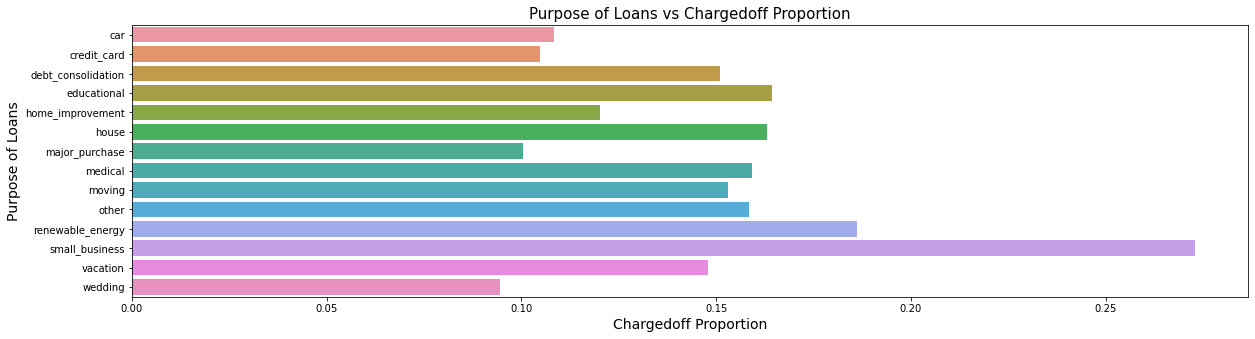

In [140]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan_status)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()

>Observations
>- The borrower who take loan for the purpose of small-business has the maximum charged off proportion.

>Grade vs Chargeoff Proportion

In [141]:
grade_vs_loan_status = data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['Chargedoff_Proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,90,166,256,0.351562
5,F,276,575,851,0.324324
4,E,624,1731,2355,0.264968
3,D,1000,3596,4596,0.217581
2,C,1208,5906,7114,0.169806
1,B,1269,9321,10590,0.119830
0,A,538,8599,9137,0.058881


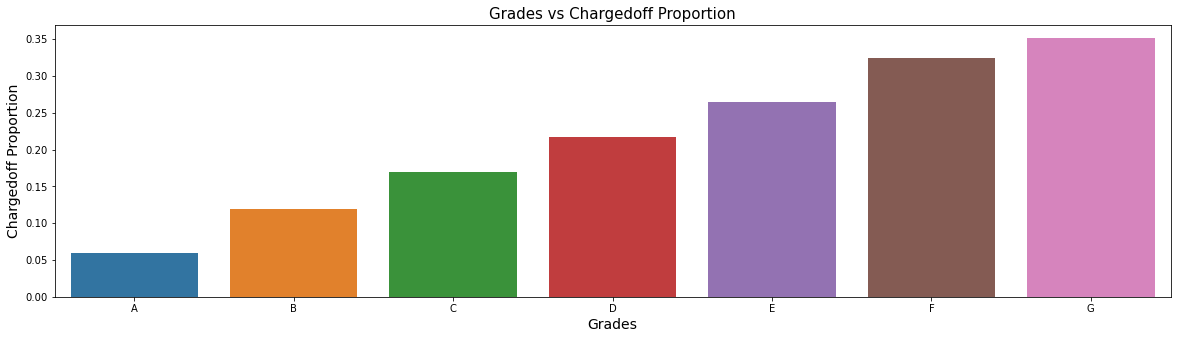

In [142]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan_status)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

>Observations
>- Grades are decreasing charged off proportion is increasing.

>Sub-Hrade vs Charge off Proportion

In [144]:
sub_grade_vs_loan_status = data.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sub_grade_vs_loan_status['Total'] = sub_grade_vs_loan_status['Charged Off'] + sub_grade_vs_loan_status['Fully Paid'] 
sub_grade_vs_loan_status['Chargedoff_Proportion'] = sub_grade_vs_loan_status['Charged Off'] / sub_grade_vs_loan_status['Total']
sub_grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,48,45,93,0.516129
32,G3,19,22,41,0.463415
34,G5,9,12,21,0.428571
31,G2,25,41,66,0.378788
28,F4,45,87,132,0.340909
30,G1,26,57,83,0.313253
26,F2,62,143,205,0.302439
23,E4,112,266,378,0.296296
27,F3,44,108,152,0.289474
25,F1,77,192,269,0.286245


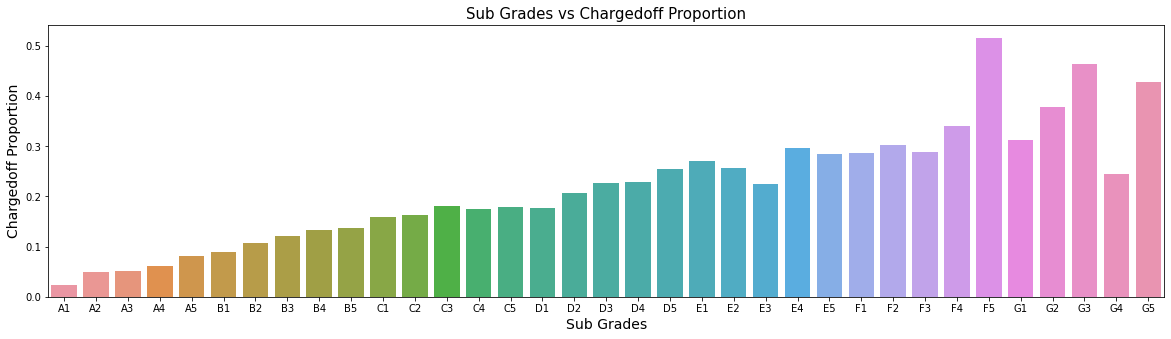

In [145]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=sub_grade_vs_loan_status)
ax1.set_xlabel('Sub Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

>Observations
>- Subgrade F5, G3 and G5 are having maximum charged off proportion.

>Interest Rate vs Chargeoff Proportion

In [146]:
int_rate_bin_vs_loan_status = data.groupby(['int_rate_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_bin_vs_loan_status['Total'] = int_rate_bin_vs_loan_status['Charged Off'] + int_rate_bin_vs_loan_status['Fully Paid'] 
int_rate_bin_vs_loan_status['Chargedoff_Proportion'] = int_rate_bin_vs_loan_status['Charged Off'] / int_rate_bin_vs_loan_status['Total']
int_rate_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,15-20,1627,4942,6569,0.247678
1,10-15,2405,14182,16587,0.144993
0,5-10,714,10368,11082,0.064429


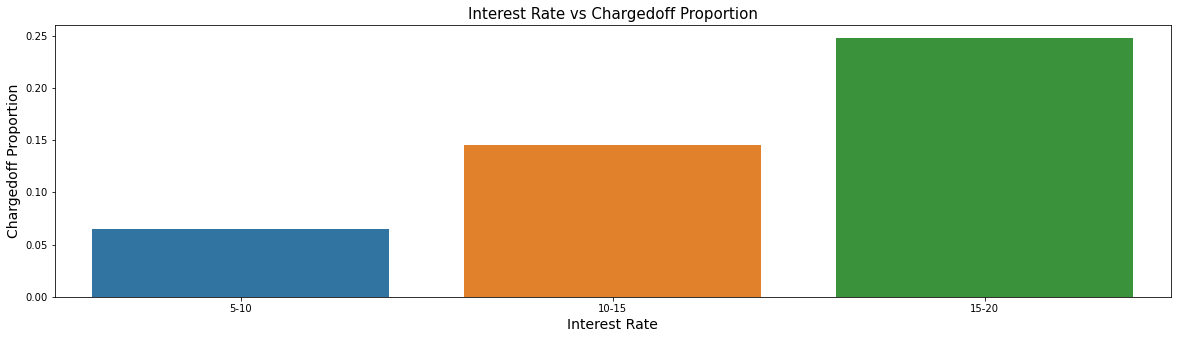

In [147]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_bin', y='Chargedoff_Proportion', data=int_rate_bin_vs_loan_status)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

>Observations
>- As interest rate are increasing, charged off proportion is also increasing.
The borrower who takes loan at the interest rate of 15 to 20 are getting mostly charged off.

>Emp Length vs Chargeoff Proportion

In [148]:
emp_length_vs_loan_status = data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Fully Paid'] 
emp_length_vs_loan_status['Chargedoff_Proportion'] = emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total']
emp_length_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,10+ years,1233,6537,7770,0.158687
7,7 years,246,1371,1617,0.152134
0,1 year,422,2521,2943,0.143391
5,5 years,426,2574,3000,0.142000
8,8 years,187,1131,1318,0.141882
6,6 years,287,1754,2041,0.140617
10,< 1 year,581,3570,4151,0.139966
3,3 years,524,3236,3760,0.139362
4,4 years,423,2721,3144,0.134542
2,2 years,530,3488,4018,0.131906


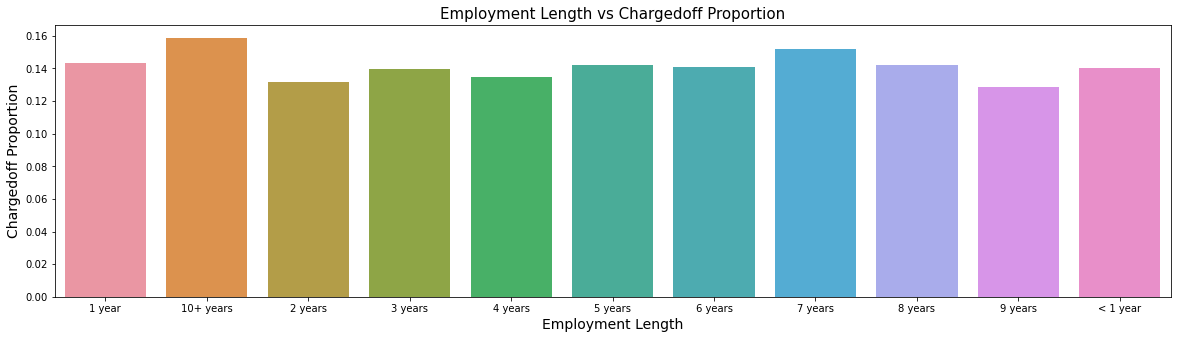

In [149]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emp_length_vs_loan_status)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

>Observations
>- The borrowers whose employee length is less than 1 year, 1 year and 10+ year are mostly getting charged off.

>Address State vs Chargeoff Proportion

In [150]:
addr_state_vs_loan_status = data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Chargedoff_Proportion'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
31,NV,96.0,343.0,439.0,0.218679
40,TN,2.0,8.0,10.0,0.200000
0,AK,13.0,55.0,68.0,0.191176
39,SD,11.0,48.0,59.0,0.186441
11,HI,28.0,127.0,155.0,0.180645
9,FL,442.0,2074.0,2516.0,0.175676
30,NM,29.0,138.0,167.0,0.173653
35,OR,67.0,340.0,407.0,0.164619
23,MO,100.0,515.0,615.0,0.162602
29,NJ,258.0,1357.0,1615.0,0.159752


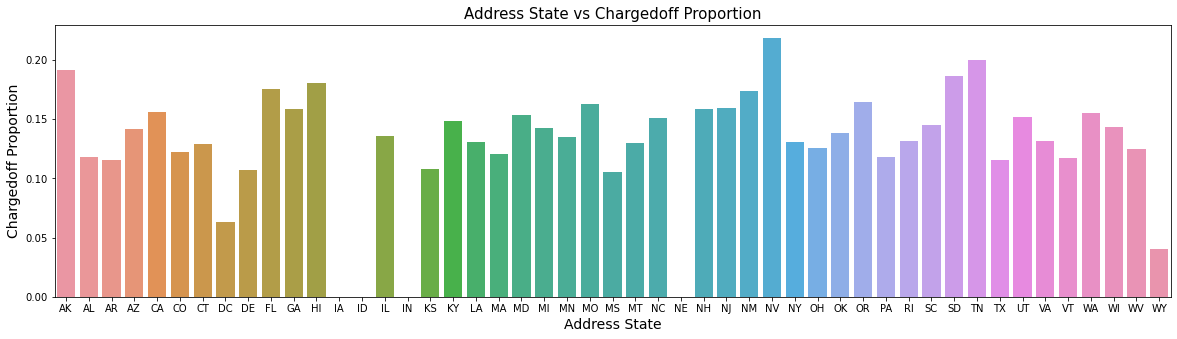

In [151]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan_status)
ax1.set_xlabel('Address State',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

>Observations
>- The borrowers who are from NV, AK, TN, SD state are mostly getting charged off.

>Verification Status vs Chargedoff Proportion

In [152]:
verification_status_vs_loan_status = data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Fully Paid'] 
verification_status_vs_loan_status['Chargedoff_Proportion'] = verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total']
verification_status_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1832,8954,10786,0.169850
1,Source Verified,1320,7639,8959,0.147338
0,Not Verified,1853,13301,15154,0.122278


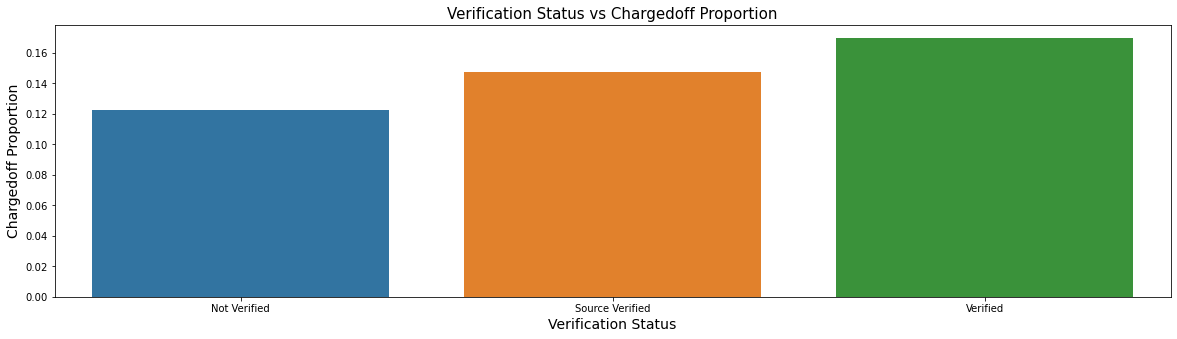

In [153]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

>Observations
>- Most of the verified borrowers are getting charged off then others.

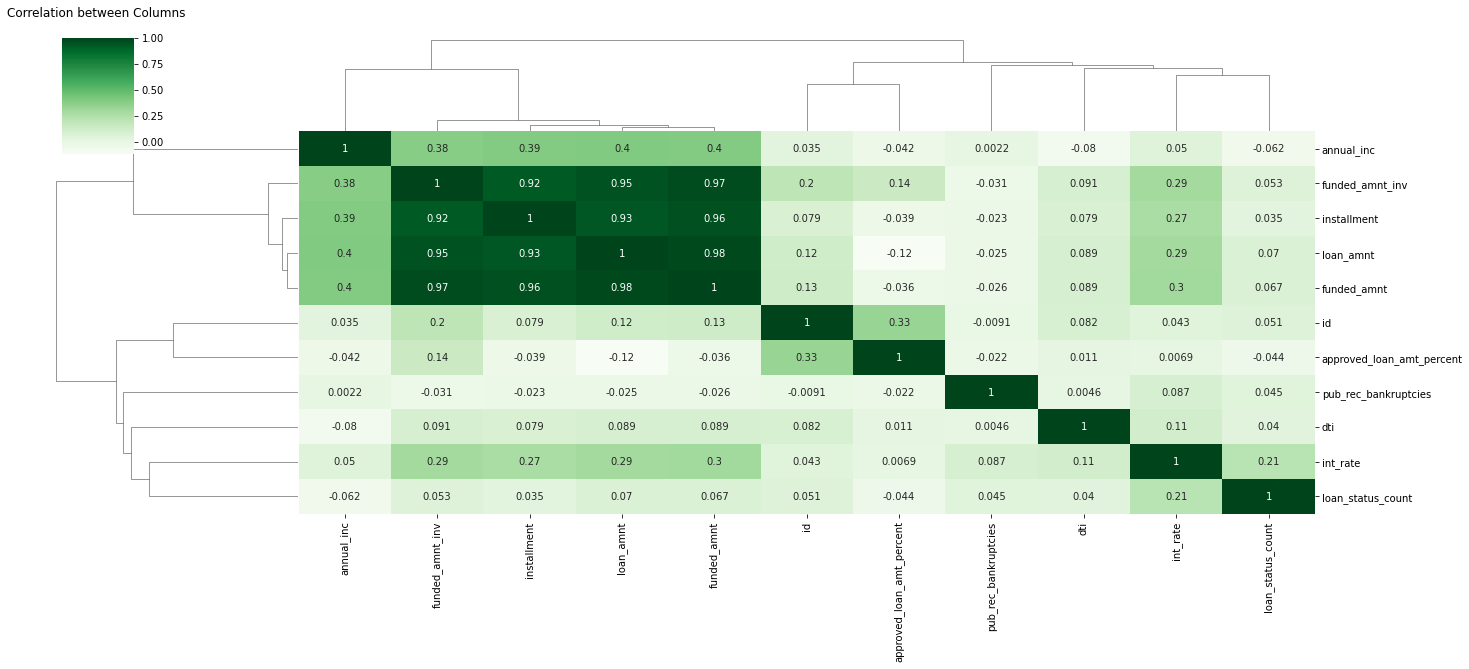

In [160]:
#finding correlation matrix
data_correlation = data.corr()
#plotting correaltion matrix on clustermap
sns.clustermap(data_correlation,annot=True,cmap='Greens',figsize=(20,9))
plt.title("Correlation between Columns \n")
plt.show()

>Observations
>- loan_amnt , funded_amnt , funded_amnt_inv , installment are strongly correlated.
>- annual_inc and dti is negatively correlated.
>- Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts.
>- Which means when annual_inc is low, debt is high and vice versa.
>- Interest Rate wont much impact on loan_amnt , funded_amnt , funded_amnt_inv , installment.
>- loan_amnt , funded_amnt , funded_amnt_inv , installment is dependent on Annual Income.

> ### <font color=red>Recommendations</font>

>- Lending club should reduce the high interest loans for 60 months tenure, they are prone to loan
default.
>- Lending club shouldn't give loan to those borrowers whose loan status is ‘Verified’ as they taken high amount of loan with 60 months tenure.
>- Borrower’s will be defaulted when they are having home ownership as ‘Rent’ and they take loan for the purpose of debt consolidation for Credit card payments.
>- Borrower’s whose annual income is low i.e. between 20k are more defaulted.
>- Lending club shouldn't give loans to thoses borrowers, who takes loan amount in the range 0 to 14000.
>- Borrower’s who receive interest at the rate of 15-20%, will be defaulted more.
>- Borrower who takes loan for the purpose of small business, Debt consolidation and cedit card payments are more defaults.
>- Grades are good metric for detecting defaulters. Lending club should examine more information from borrowers before issuing loans to Low grade (G to A).
>- Lending Club shouldn't provide loans to these states i.e. NV, AK, TN, SD, as most of the people are defaulted from these places only.
>- Those borrowers whom employment length is less than and equals to 1 are more prone to defulater, Lending club should aware of these while giving loans.


## <font color=red>$$ # END $$</font>